In [1]:
import BatteryDataToolkit
from BatteryDataToolkit import DataInitializer, DataVisualizer
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib

def reloader_init():
    importlib.reload(BatteryDataToolkit)
    return BatteryDataToolkit.DataInitializer

def reloader_visual():
    importlib.reload(BatteryDataToolkit)
    return BatteryDataToolkit.DataVisualizer


## NASA Dataset

In [2]:
# Provide the path to your .mat file and the battery name
file_path = './Datasets/NASA/B0018.mat'
battery_to_process = 'B0018'

data_loader = DataInitializer()
NASA_data = data_loader.load_NASA(file_path = file_path, battery_name = battery_to_process)

# The output structure is now identical to the other methods
print("\nOutput keys:", list(NASA_data.keys()))
print("\nCharge DataFrame shape:", NASA_data['data_ch'].shape)
print("Discharge DataFrame head:\n", NASA_data['data_dch'].head())
print("\nNumber of cycles found:", len(NASA_data['cycles']))
print("Shape of equalized discharge voltage array:", NASA_data['Equalized_dch']['voltage'].shape)
print("\nFirst 5 discharge capacities (Ah):", [f'{c:.4f}' for c in NASA_data['dch_cap'][:5]])
print("First 5 charge capacities (Ah):", [f'{c:.4f}' for c in NASA_data['ch_cap'][:5]])


Dataset successfully loaded from: ./Datasets/NASA/B0018.mat

Output keys: ['data_dch', 'data_ch', 'Original_dch', 'Original_ch', 'Equalized_dch', 'Equalized_ch', 'cycles', 'dch_cap', 'ch_cap', 'HIs_dch', 'HIs_ch']

Charge DataFrame shape: (279810, 6)
Discharge DataFrame head:
    Cycle Step Type    Time   Voltage   Current  Temperature  Capacity
0      1   CC DChg   0.000  4.188109  0.000131    23.819520  1.855005
1      1   CC DChg   9.422  4.188196  0.001459    23.828807  1.855005
2      1   CC DChg  19.578  3.977432 -2.005672    23.844944  1.855005
3      1   CC DChg  29.016  3.961974 -2.012206    23.925577  1.855005
4      1   CC DChg  38.485  3.949835 -2.012005    24.010628  1.855005

Number of cycles found: 132
Shape of equalized discharge voltage array: (132, 366)

First 5 discharge capacities (Ah): ['1.8550', '1.8432', '1.8396', '1.8307', '1.8327']
First 5 charge capacities (Ah): ['0.7807', '1.8702', '1.8690', '1.8603', '1.8469']


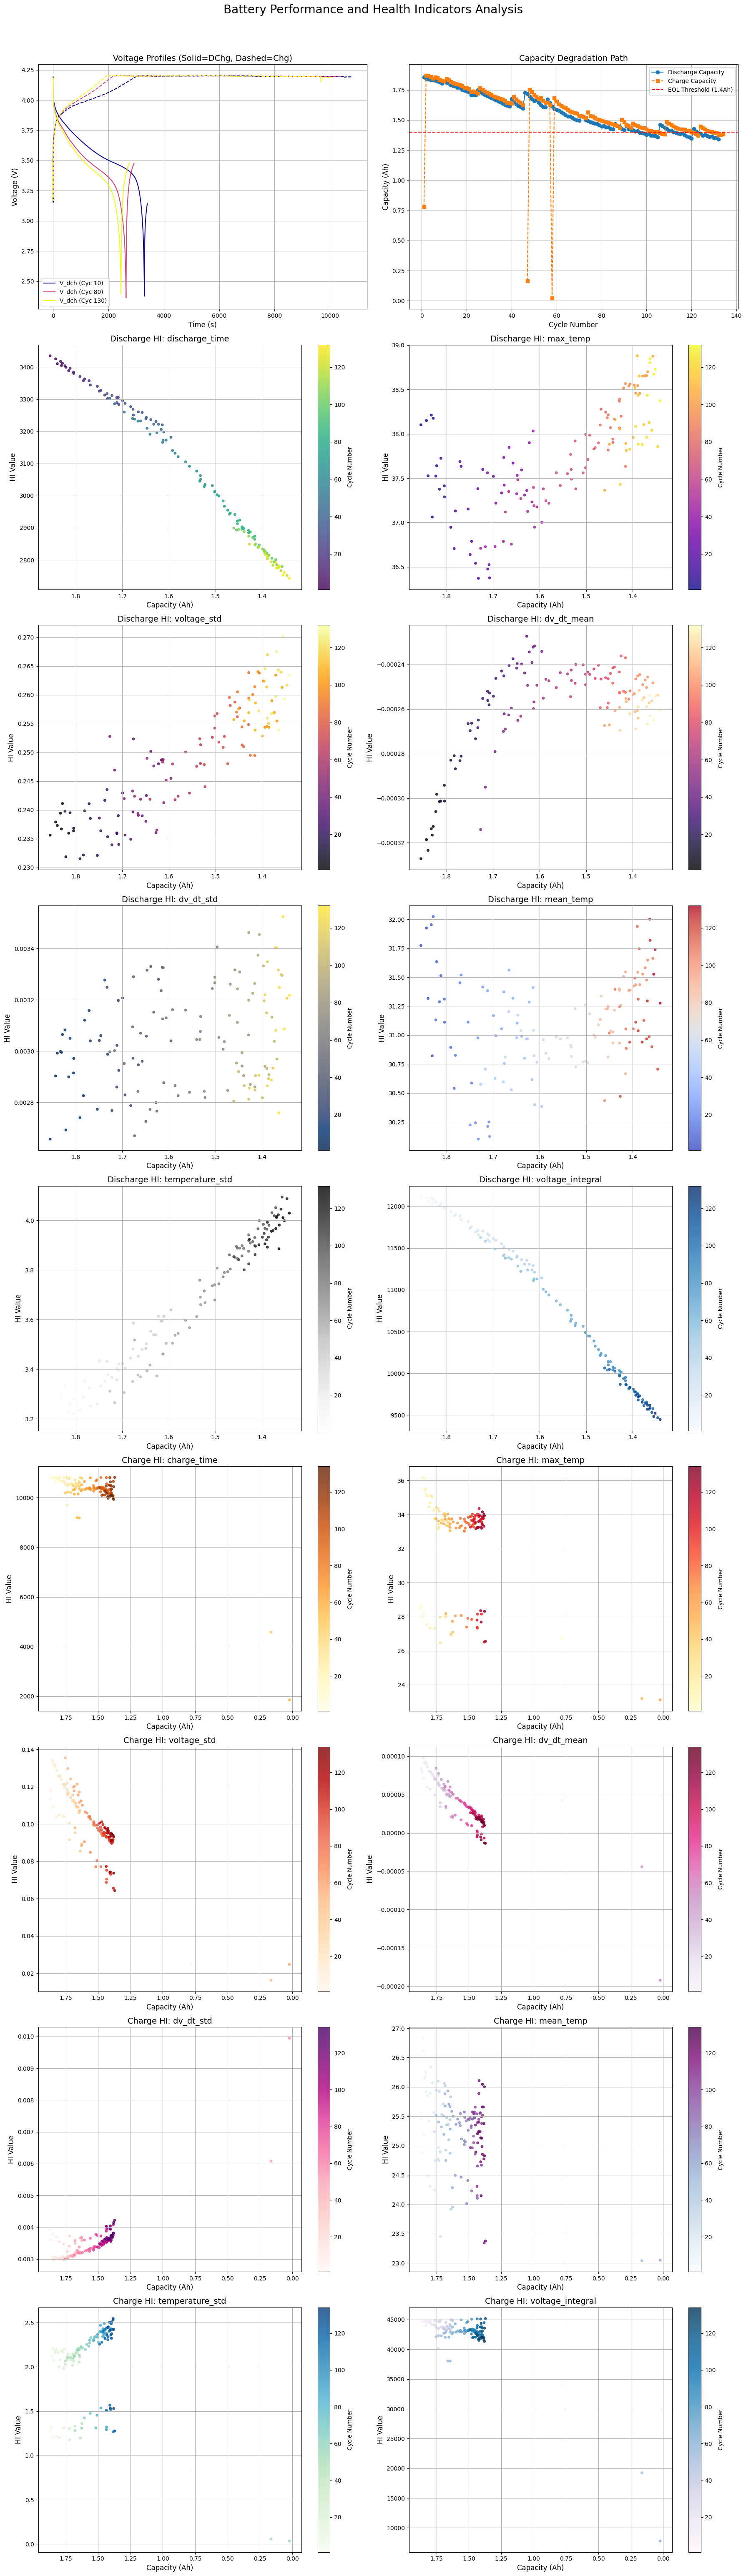

In [63]:
plotter = DataVisualizer(NASA_data)

cycles_to_plot=[10, 80, 130]
dch_his_to_plot=['discharge_time', 'max_temp', 'voltage_std','dv_dt_mean','dv_dt_std','mean_temp','temperature_std','voltage_integral']
ch_his_to_plot=['charge_time', 'max_temp', 'voltage_std','dv_dt_mean','dv_dt_std','mean_temp','temperature_std','voltage_integral']
normalize_his = False
hi_xaxis='capacity'

plotter.plot_all(cycles_to_plot = cycles_to_plot, 
                 dch_his_to_plot=dch_his_to_plot, ch_his_to_plot=ch_his_to_plot, 
                 normalize_his=normalize_his, hi_xaxis=hi_xaxis)


## Oxford Dataset

In [48]:
# Provide the path to your .mat file and the battery name
file_path = './Datasets/Oxford/Oxford_Battery_Degradation_Dataset_1.mat'
battery_to_process = 8 # Change this to the desired battery number (1-8)

data_loader = reloader_init()(cutoff=0.1, fs=5, order=2, window_size=30)
Oxford_data = data_loader.load_oxford(file_path = file_path, cell_number = battery_to_process)

# The output structure is now identical to the other methods
print("\nOutput keys:", list(Oxford_data.keys()))
print("\nCharge DataFrame shape:", Oxford_data['data_ch'].shape)
print("Discharge DataFrame head:\n", Oxford_data['data_dch'].head())
print("\nNumber of cycles found:", len(Oxford_data['cycles']))
print("Shape of equalized discharge voltage array:", Oxford_data['Equalized_dch']['voltage'].shape)
print("\nFirst 5 discharge capacities (Ah):", [f'{c:.4f}' for c in Oxford_data['dch_cap'][:5]])
print("First 5 charge capacities (Ah):", [f'{c:.4f}' for c in Oxford_data['ch_cap'][:5]])


Cell #8 Data successfully loaded from: ./Datasets/Oxford/Oxford_Battery_Degradation_Dataset_1.mat

Output keys: ['data_dch', 'data_ch', 'Original_dch', 'Original_ch', 'Equalized_dch', 'Equalized_ch', 'cycles', 'dch_cap', 'ch_cap', 'HIs_dch', 'HIs_ch']

Charge DataFrame shape: (224241, 6)
Discharge DataFrame head:
    Cycle Step Type      Time   Voltage  Capacity  Temperature
0      0   CC DChg  0.000000  4.190102  0.000000    39.869350
1      0   CC DChg  0.999985  4.174346 -0.195287    39.894321
2      0   CC DChg  1.999992  4.172742 -0.400723    39.856884
3      0   CC DChg  2.999985  4.171540 -0.606160    39.906788
4      0   CC DChg  3.999992  4.170096 -0.811593    39.881855

Number of cycles found: 76
Shape of equalized discharge voltage array: (76, 3543)

First 5 discharge capacities (Ah): ['-727.5280', '-720.0436', '-713.4369', '-709.5431', '-706.6031']
First 5 charge capacities (Ah): ['711.9567', '703.0846', '696.9466', '692.2834', '689.0867']


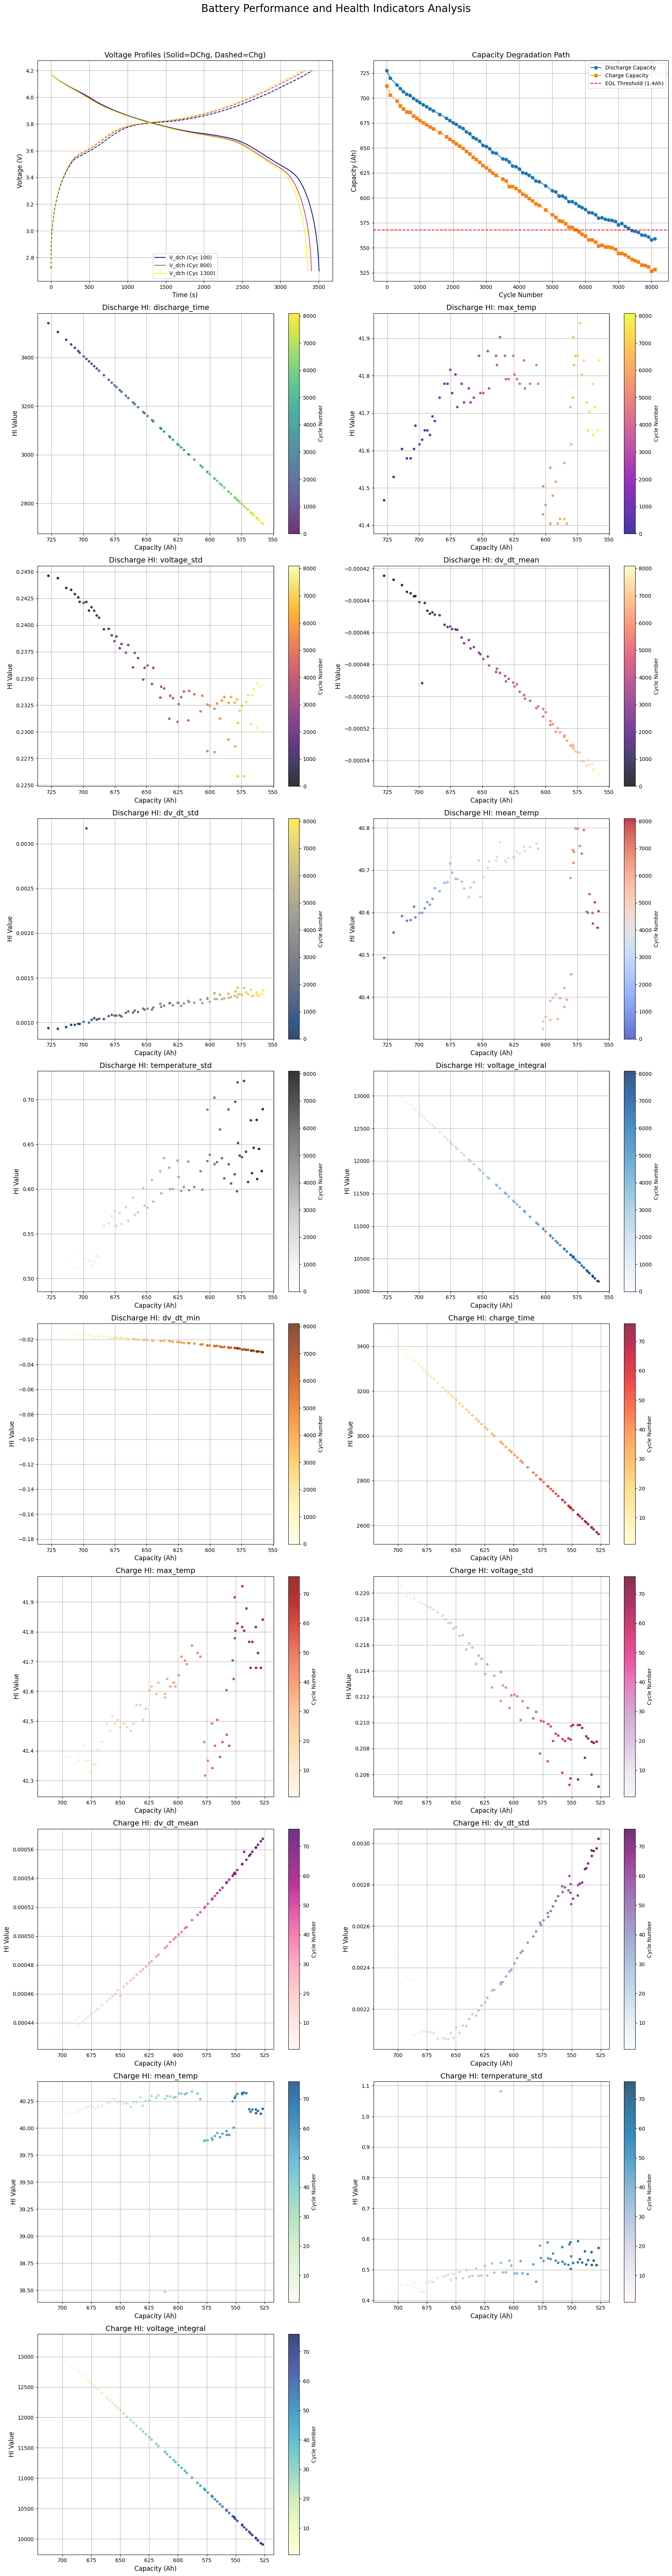

In [49]:
plotter = reloader_visual()(Oxford_data)

cycles_to_plot=[100, 800, 1300]
dch_his_to_plot=['discharge_time', 'max_temp', 'voltage_std','dv_dt_mean','dv_dt_std','mean_temp','temperature_std','voltage_integral','dv_dt_min']
ch_his_to_plot=['charge_time', 'max_temp', 'voltage_std','dv_dt_mean','dv_dt_std','mean_temp','temperature_std','voltage_integral']
normalize_his = False
hi_xaxis='capacity'

data = plotter.plot_all(cycles_to_plot = cycles_to_plot, 
                 dch_his_to_plot=dch_his_to_plot, ch_his_to_plot=ch_his_to_plot, 
                 normalize_his=normalize_his, hi_xaxis=hi_xaxis)
